/Users/ciaranohare/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in double_scalars



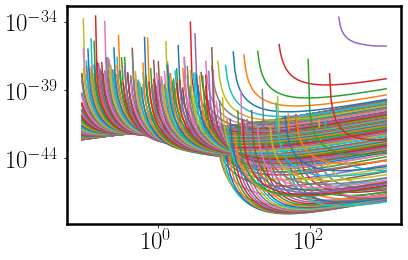

In [24]:
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.integrate import cumtrapz
from LabFuncs import *
from Params import *
from NeutrinoFuncs import *
from WIMPFuncs import *
from PlotFuncs import *

nm = 200
mvals = logspace(-1.0,3.0,nm)

def NuFloor_1event(mvals,Nuc):
    # Load neutrino fluxes
    NuBG = GetNuFluxes(0.0,Nuc)
    E_nu_all = NuBG.Energy
    Flux_all = NuBG.Flux
    n_nu = NuBG.NumberOfNeutrinos 
    Errs = NuBG.Uncertainties

    nths = 100
    E_ths = logspace(log10(0.0001),log10(500.0),nths)
    t = JulianDay(9,12,2018,18.0)*ones(shape=nths)
    solar = NuBG.SolarLabel
    Loc = Boulby

    R = zeros(shape=nths)
    for i in range(0,n_nu):
        R = R+dRdE_nu(E_ths,t,solar[i],E_nu_all[:,i],Flux_all[:,i],Nuc)
    cumR = flipud(cumtrapz(flipud(E_ths),flipud(R)))
    cumR = append(cumR,cumR[-1])
    Exposures = 1.0/cumR 

    nm = size(mvals)

    DL = zeros(shape=(nm,nths))
    for j in range(0,nths):
        Evals = logspace(log10(E_ths[j]),log10(1000.0),200)
        for i in range(0,nm):
            m = mvals[i]
            Nw = Exposures[j]*trapz(dRdE_wimp(Evals,t,WIMP(m,1.0e-45),SHM,Nuc,Loc),Evals)
            DL[i,j] = 3.2*1.0e-45/Nw
        plt.loglog(mvals,DL[:,j])

    nu1 = amin(DL,1)
    return nu1

nu_He = NuFloor_1event(mvals,He4)
nu_Xe = NuFloor_1event(mvals,Xe131)
nu_F = NuFloor_1event(mvals,F19)


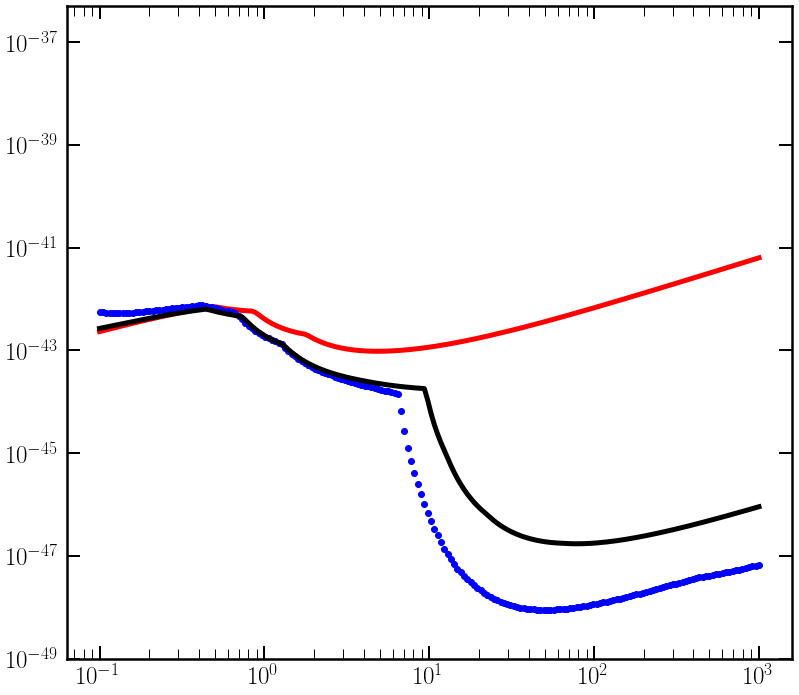

In [26]:
fig,ax = MySquarePlot()
plt.loglog(mvals,nu_He,'r-',lw=5)
plt.loglog(mvals,nu_Xe,'bo',lw=5)
plt.loglog(mvals,nu_F,'k-',lw=5)
plt.ylim(1e-49,5e-37)
plt.show()

In [36]:
data_Xe = vstack((mvals,nu_Xe))
savetxt('../data/WIMPlimits/SI/NuFloor_1event_Xe.txt',data_Xe.T)
data_F = vstack((mvals,nu_F))
savetxt('../data/WIMPlimits/SI/NuFloor_1event_F.txt',data_F.T)
data_He = vstack((mvals,nu_He))
savetxt('../data/WIMPlimits/SI/NuFloor_1event_He.txt',data_He.T)

In [ ]:
data_Xe = vstack((mvals,nu_Xe*))
savetxt(data_Xe.T,'../data/WIMPlimits/SD/NuFloor_1event_Xe.txt')
data_F = vstack((mvals,nu_F*))
savetxt(data_F.T,'../data/WIMPlimits/SD/NuFloor_1event_F.txt')


In [27]:
nu_SI = loadtxt("../data/WIMPLimits/SI/nufloor-F.txt")
nu_SD = loadtxt("../data/WIMPLimits/SD/nufloor-F.txt")
print(nu_SI[:,1]/nu_SD[:,1])

nu_SI = loadtxt("../data/WIMPLimits/SI/nufloor-Xe.txt")
nu_SD = loadtxt("../data/WIMPLimits/SD/nufloor-Xe.txt")
print(nu_SI[:,1]/nu_SD[:,1])

[0.00189876 0.00189876 0.00189876 0.00189876 0.00189876 0.00189876
 0.00189876 0.00189876 0.00189876 0.00189876 0.00189876 0.00189876
 0.00189876 0.00189876 0.00189876 0.00189876 0.00189876 0.00189876
 0.00189876 0.00189876 0.00189876 0.00189876 0.00189876 0.00189876
 0.00189876 0.00189876 0.00189876 0.00189876 0.00189876 0.00189876
 0.00189876 0.00189876 0.00189876 0.00189876 0.00189876 0.00189876
 0.00189876 0.00189876 0.00189876 0.00189876 0.00189876 0.00189876
 0.00189876 0.00189876 0.00189876 0.00189876 0.00189876 0.00189876
 0.00189876 0.00189876 0.00189876 0.00189876 0.00189876 0.00189876
 0.00189876 0.00189876 0.00189876 0.00189876 0.00189876 0.00189876
 0.00189876 0.00189876 0.00189876 0.00189876 0.00189876 0.00189876
 0.00189876 0.00189876 0.00189876 0.00189876 0.00189876 0.00189876
 0.00189876 0.00189876 0.00189876 0.00189876 0.00189876 0.00189876
 0.00189876 0.00189876 0.00189876 0.00189876 0.00189876 0.00189876
 0.00189876 0.00189876 0.00189876 0.00189876 0.00189876 0.0018

In [33]:
A = 19
S_p = 0.478
J = 0.5
C_F = (4/3)*((J+1)/J)*(S_p)**2.0/A**2
C_F/2.0

0.0012658393351800553

In [29]:
shape(nu_SI)

(1000, 2)

6.68806790591069e-08

In [37]:
nu_SI = loadtxt("../data/WIMPLimits/SI/nufloor-Xe.txt")
nu_SD = loadtxt("../data/WIMPLimits/SD/nufloor-Xe.txt")
nu_SI[-1,1]/nu_SD[-1,1]

6.68806790591069e-08